Data: https://drive.google.com/file/d/1CEql-OEexf9p02M5vCC1RDLXibHYE9Xz/view?usp=drivesdk

# V1

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data and processing

In [5]:
heart_data = pd.read_csv("/home/sabi/datasets/heart_disease_data.csv")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# number of row and cols
heart_data.shape

(303, 14)

In [7]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# statistical measure
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# checking the distribution of 'Target'
heart_data['target'].value_countsnts()

1    165
0    138
Name: target, dtype: int64

1 --> defective heart
0 --> healthy heart

Splitting Features and Target

In [11]:
x = heart_data.drop(columns='target', axis=1)
y = heart_data['target']

In [13]:
#split into test and train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y,random_state=2)

In [14]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

Logistic Regression

In [15]:
model = LogisticRegression()

In [16]:
model.fit(x_train, y_train)

/home/sabi/system/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

In [22]:
# accuracy score on training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
print("Accuracy on training data: ", training_data_accuracy)

Accuracy on training data:  0.8512396694214877


In [23]:
# accuracy score on testing data
x_test_prediction = model.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_prediction, y_test)
print("Accuracy on testing data: ", testing_data_accuracy)

Accuracy on testing data:  0.819672131147541


Build Predicting System

In [37]:
input_data = (41,0,1,130,204,0,0,172,0,1.4,2,0,2)

#change input to numpy array
input_data_np = np.asarray(input_data)

#reshape the numpy array as we are predicting for only 1 instance
input_data_reshape = input_data_np.reshape(1, -1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0] == 0):
    print("The preson does not Heart Disease")
else:
    print("The person has Heart Disease")

[1]
The person has Heart Disease


/home/sabi/system/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# V2

### Data Collection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
#warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/home/sabi/datasets/heart_disease_data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

### Data preparation

check for null and duplicates

In [5]:
# null values
print("\n---NULL Count---\n{}".format(df.isnull().sum()))

# duplicate values
print("\nDuplicate Count: {}".format(df.duplicated().sum()))


---NULL Count---
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Duplicate Count: 1


In [6]:
# drop duplicates
df.drop_duplicates(inplace = True)
print("\nDuplicate Count: {}".format(df.duplicated().sum()))


Duplicate Count: 0


In [7]:
df.shape

(302, 14)

Feature engineering

In [9]:
# rename columns (attributes) for better readablility
df.rename(columns={
    'cp': 'chest_pain_type',
    'trestbps': 'resting_blood_pressure',
    'chol': 'cholestoral',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'resting_electrocardiographic',
    'thalach': 'maximum_heart_rate',
    'exang': 'exercise_induced_angina',
    'oldpeak': 'ST_depression',
    'slope': 'slope_peak_exercise_ST',
    'ca': 'number_of_major_vessels'},
inplace=True)

print(df.columns.tolist())

['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestoral', 'fasting_blood_sugar', 'resting_electrocardiographic', 'maximum_heart_rate', 'exercise_induced_angina', 'ST_depression', 'slope_peak_exercise_ST', 'number_of_major_vessels', 'thal', 'target']


In [10]:
# update categorical features for better readability & plotting

df['sex'] = df['sex'].map({0: 'female', 1: 'male'})

df['chest_pain_type'] = df['chest_pain_type'].map({0: 'typical angina', 1: 'atypical angina', 2: 'non-anginal', 3: 'asymptomatic'})

df['fasting_blood_sugar'] = df['fasting_blood_sugar'].map({0: '> 120 mg/dl', 1: '< 120 mg/dl'})

df['resting_electrocardiographic'] = df['resting_electrocardiographic'].map({0: 'normal', 1: 'ST-T wave abnormality', 2: 'ventricular hypertrophy'})

df['exercise_induced_angina'] = df['exercise_induced_angina'].map({0: 'no', 1: 'yes'})

df['slope_peak_exercise_ST'] = df['slope_peak_exercise_ST'].map({0: 'upsloping', 1: 'flat', 2: 'downsloping'})

df['thal'] = df['thal'].map({0: 'normal 0', 1: 'normal 1', 2: 'fixed defect', 3: 'reversable defect'})

df['target'] = df['target'].map({0: 'no disease', 1: 'disease'})

df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,ST_depression,slope_peak_exercise_ST,number_of_major_vessels,thal,target
0,63,male,asymptomatic,145,233,< 120 mg/dl,normal,150,no,2.3,upsloping,0,normal 1,disease
1,37,male,non-anginal,130,250,> 120 mg/dl,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,disease
2,41,female,atypical angina,130,204,> 120 mg/dl,normal,172,no,1.4,downsloping,0,fixed defect,disease
3,56,male,atypical angina,120,236,> 120 mg/dl,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,disease
4,57,female,typical angina,120,354,> 120 mg/dl,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,disease


### Understanding the data

Data types

In [13]:
print(df.info())
print("\nData Shape: {}".format(df.shape))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           302 non-null    int64  
 1   sex                           302 non-null    object 
 2   chest_pain_type               302 non-null    object 
 3   resting_blood_pressure        302 non-null    int64  
 4   cholestoral                   302 non-null    int64  
 5   fasting_blood_sugar           302 non-null    object 
 6   resting_electrocardiographic  302 non-null    object 
 7   maximum_heart_rate            302 non-null    int64  
 8   exercise_induced_angina       302 non-null    object 
 9   ST_depression                 302 non-null    float64
 10  slope_peak_exercise_ST        302 non-null    object 
 11  number_of_major_vessels       302 non-null    int64  
 12  thal                          302 non-null    object 
 13  targe

Statistical summary

In [15]:
# numerical data
df.describe()

,age,resting_blood_pressure,cholestoral,maximum_heart_rate,ST_depression,number_of_major_vessels
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046,0.718543
std,9.04797,17.563394,51.753489,22.903527,1.161452,1.006748
min,29.00000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000,0.000000
75%,61.00000,140.000000,274.750000,166.000000,1.600000,1.000000
max,77.00000,200.000000,564.000000,202.000000,6.200000,4.000000


In [17]:
# categorical data
df.describe(include=['O'])

,sex,chest_pain_type,fasting_blood_sugar,resting_electrocardiographic,exercise_induced_angina,slope_peak_exercise_ST,thal,target
count,302,302,302,302,302,302,302,302
unique,2,4,2,3,2,3,4,2
top,male,typical angina,> 120 mg/dl,ST-T wave abnormality,no,downsloping,fixed defect,disease
freq,206,143,257,151,203,141,165,164


Types of data

In [18]:
#  Separate out Categorical and Numeric data
colCAT = []
colNUM = []
for i in df.columns:
    if (len(df[i].unique())) > 5:
        colNUM.append(i)
    else:
        colCAT.append(i)
    print('unique values:  {}\t{}'.format(len(df[i].unique()),i))

dataCAT = df[colCAT]     #  Categorical columns
colNUM.append('target')  #  add target column to Numeric
dataNUM = df[colNUM]     #  Numeric columns


unique values:  41	age
unique values:  2	sex
unique values:  4	chest_pain_type
unique values:  49	resting_blood_pressure
unique values:  152	cholestoral
unique values:  2	fasting_blood_sugar
unique values:  3	resting_electrocardiographic
unique values:  91	maximum_heart_rate
unique values:  2	exercise_induced_angina
unique values:  40	ST_depression
unique values:  3	slope_peak_exercise_ST
unique values:  5	number_of_major_vessels
unique values:  4	thal
unique values:  2	target


### Exploratory Data Analysis

Plots - categorical data

In [19]:
dataCAT.head()

,sex,chest_pain_type,fasting_blood_sugar,resting_electrocardiographic,exercise_induced_angina,slope_peak_exercise_ST,number_of_major_vessels,thal,target
0,male,asymptomatic,< 120 mg/dl,normal,no,upsloping,0,normal 1,disease
1,male,non-anginal,> 120 mg/dl,ST-T wave abnormality,no,upsloping,0,fixed defect,disease
2,female,atypical angina,> 120 mg/dl,normal,no,downsloping,0,fixed defect,disease
3,male,atypical angina,> 120 mg/dl,ST-T wave abnormality,no,downsloping,0,fixed defect,disease
4,female,typical angina,> 120 mg/dl,ST-T wave abnormality,yes,downsloping,0,fixed defect,disease


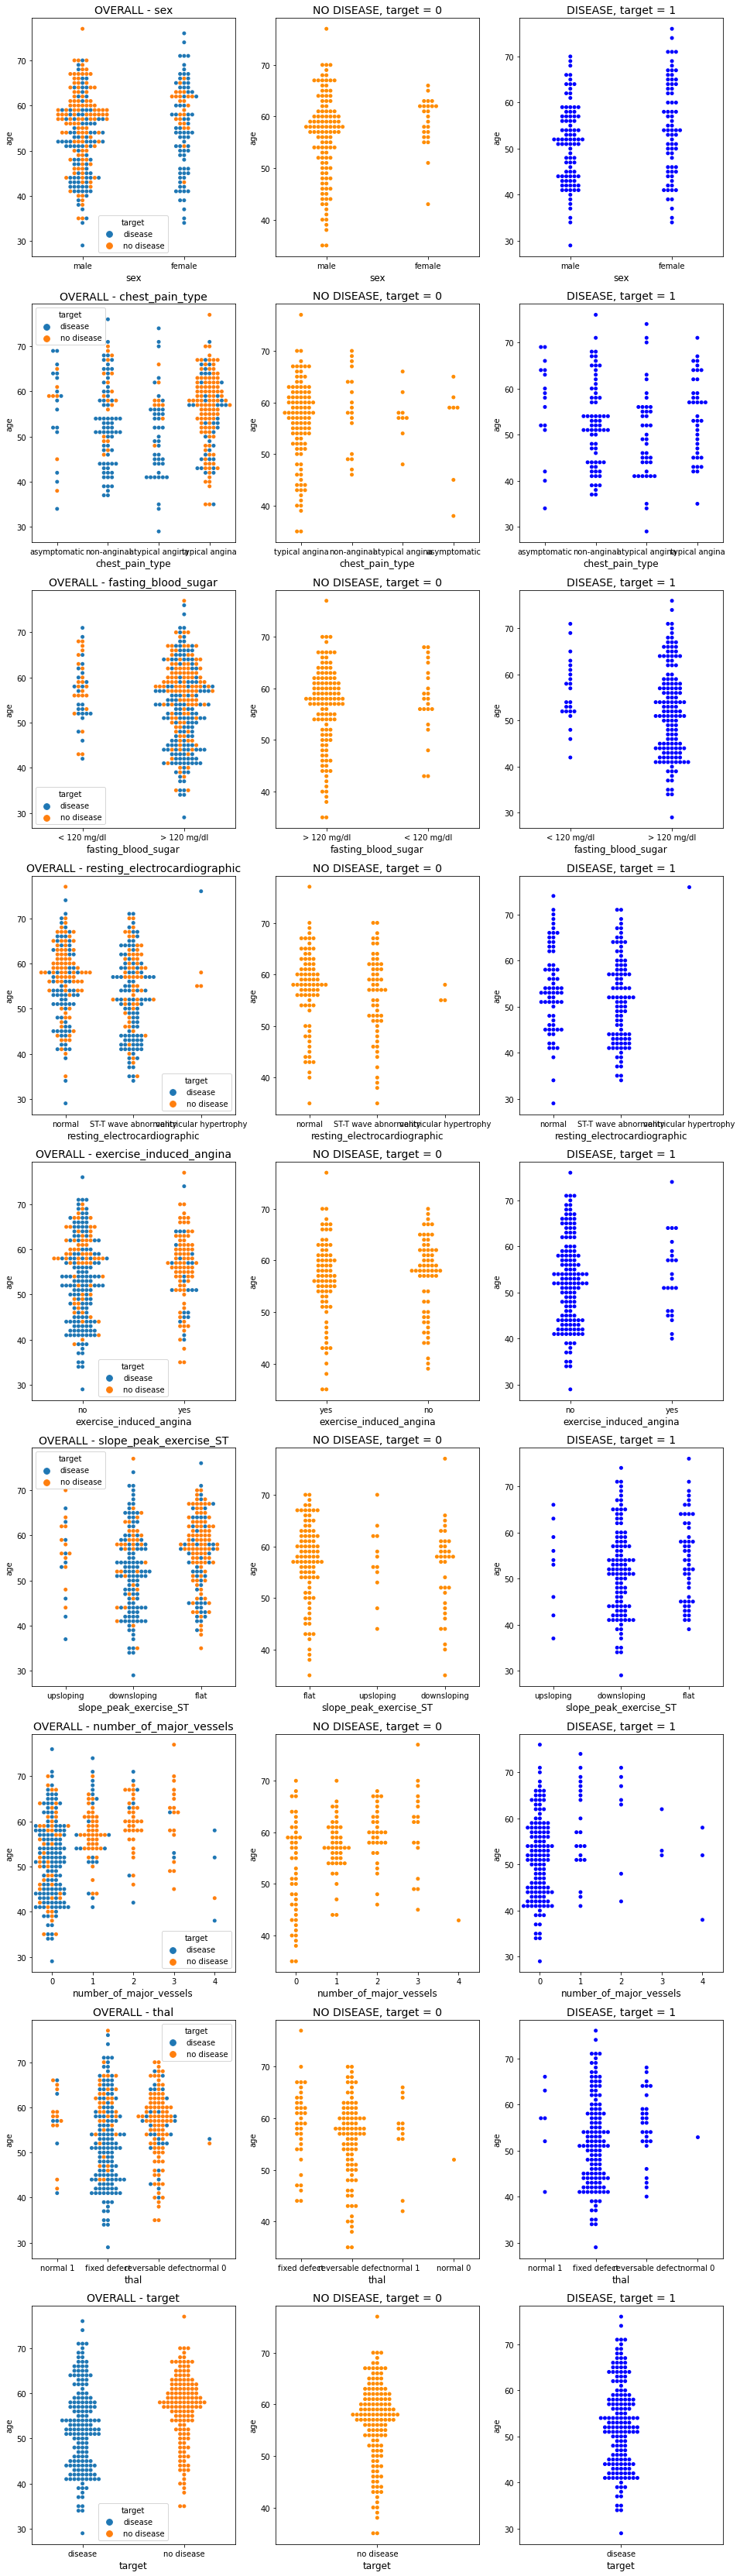

In [20]:
#catergorical data plotted using Seaborn's swarmplot
diseaseCAT    = df[(df['target'] == 'disease')]
no_diseaseCAT = df[(df['target'] == 'no disease')]

#  fig.add_subplot([# of rows] by [# of columns] by [plot#])
subNumOfRow = len(dataCAT.columns)
subNumOfCol = 3     # three columns: overall, no disease, disease
subPlotNum  = 1     # initialize plot number

fig = plt.figure(figsize=(16,60))

for i in colCAT:
    # overall
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('OVERALL - {}'.format(i), fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.swarmplot(data=df, x=df[i],y=df.age,hue=df.target)
    subPlotNum = subPlotNum + 1
    # no_diseaseCAT
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('NO DISEASE, target = 0', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.swarmplot(data=no_diseaseCAT, x=no_diseaseCAT[i],y=no_diseaseCAT.age,color='darkorange')
    subPlotNum = subPlotNum + 1
    # diseaseCAT
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('DISEASE, target = 1', fontsize=14)
    plt.xlabel(i, fontsize=12)
    #sns.countplot(diseaseCAT[i], hue=df.sex)#,color='darkred')
    sns.swarmplot(data=diseaseCAT, x=diseaseCAT[i],y=diseaseCAT.age,color='blue')
    subPlotNum = subPlotNum + 1
plt.show()

Observation

- sex:
    1. data has more male with no heart disease than female
    2. the population of patients with heart disease is almost same
    3. female population spread over a longer age range
    
- chest_pain_type
    1. typical angina accounts for most cases with no heart disease
    2. Populations with anything other than typical angina have a higher chance of having heart disease

- fasting_blood_sugar
    1. not a good indicator of heart disease since healthy and unhealthy population distribution is almost the same
    
- resting_electrocardiographic
    1. not a good indicator of heart disease since healthy and unhealthy population distribution is almost the same
    
- exercise_induced_angina
    1. not a good indicator of heart disease since healthy and unhealthy population distribution is almost the same
    
- slope_peak_exercise_ST
    1. populations with downsloping and flat sloping have a higher incidence of heart disease
    
- number_of_major_vessels
    1. patients with no vessels colored by fluoroscopy have a much higher incidence of heart disease
    
- thal
    1. patients with fixed defect have a significantly higher incidence of heart disease

Plots - numeric data

In [23]:
dataNUM.head()

,age,resting_blood_pressure,cholestoral,maximum_heart_rate,ST_depression,target
0,63,145,233,150,2.3,disease
1,37,130,250,187,3.5,disease
2,41,130,204,172,1.4,disease
3,56,120,236,178,0.8,disease
4,57,120,354,163,0.6,disease


/home/sabi/system/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sabi/system/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sabi/system/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

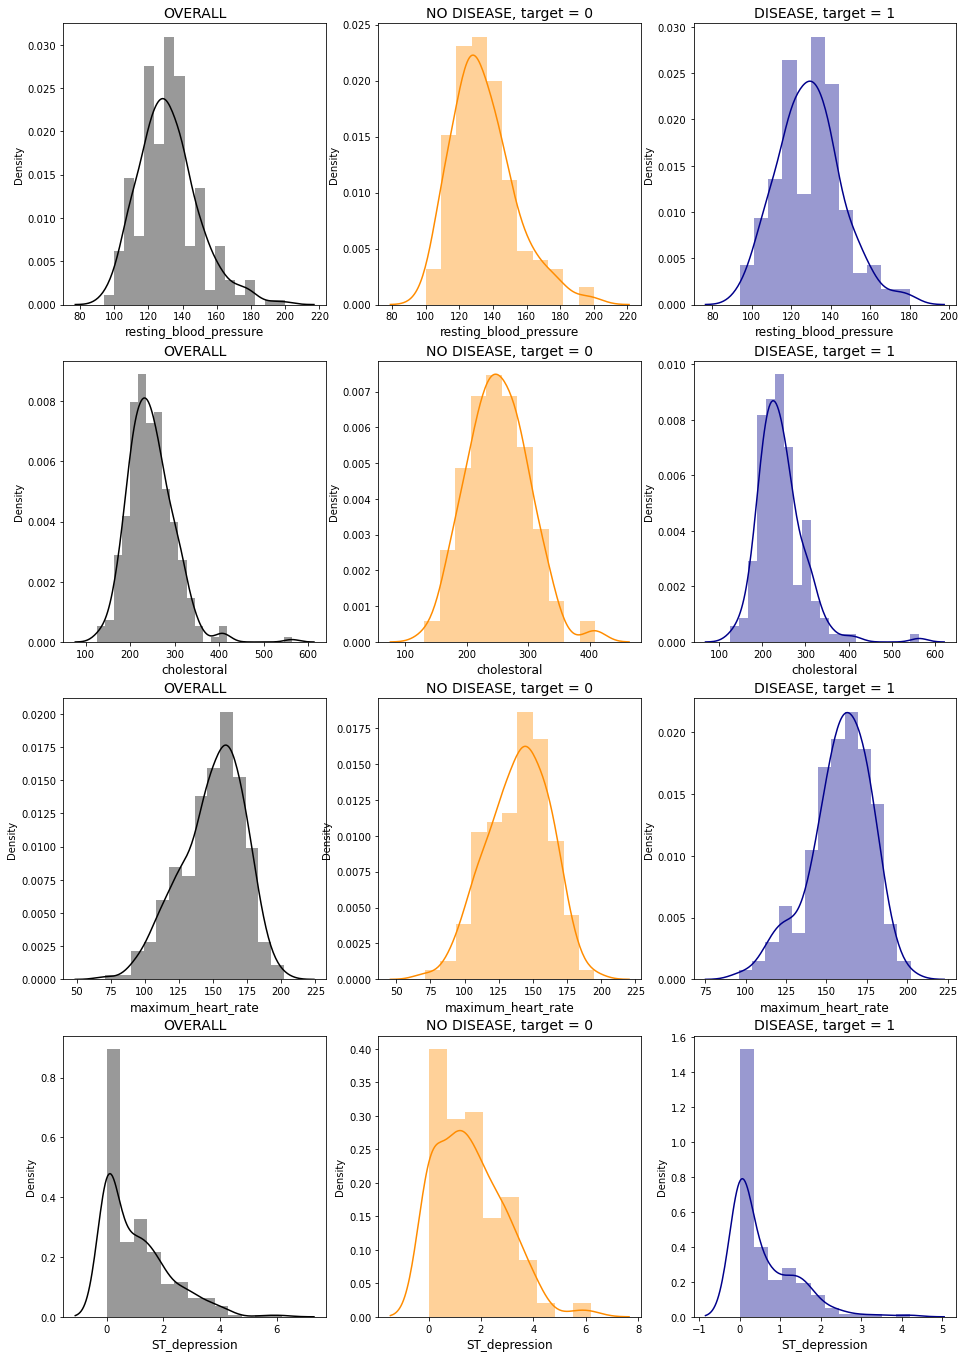

In [24]:
# numeric data plotted using Seaborn's distplot
#  assign NUM dataframe for "no disease" and "disease"
no_diseaseNUM = dataNUM[(df['target'] == 'no disease')]
diseaseNUM    = dataNUM[(df['target'] == 'disease')]

#  fig.add_subplot([# of rows] by [# of columns] by [plot#])
subNumOfRow = len(dataNUM.columns)-1   #  x='age' in plots, drop column
subNumOfCol = 3     # three columns: overall, no disease, disease
subPlotNum  = 1     # initialize plot number

fig = plt.figure(figsize=(16,30))

for i in dataNUM.columns.drop(["age","target"]):
    # overall
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('OVERALL', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.distplot(df[i],color='black')
    subPlotNum = subPlotNum + 1
    # no_diseaseNUM
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('NO DISEASE, target = 0', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.distplot(no_diseaseNUM[i],color='darkorange')
    subPlotNum = subPlotNum + 1
    # diseaseNUM
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('DISEASE, target = 1', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.distplot(diseaseNUM[i],color='darkblue')
    subPlotNum = subPlotNum + 1

plt.show()

Observation

- There are no discernible patterns from the plots between blood pressure, cholesterol, max heartbeat, ST depression and heart disease with respect to age & sex

- Correlation will give us better understanding of the relationships between the attributes and heart disease

### Model - Logistic Regression

One Hot encoding

In [25]:
#  one hot encoding works on type 'object'
for i in colCAT:
    df[i] = df[i].astype(object)
    
df_OHE = df[colCAT]               #  dataframe with categorical values
df_OHE = pd.get_dummies(df_OHE)   #  one-hot encoding
df_OHE = df_OHE.join(df[colNUM])  #  add numeric columns

#  change target data to 0/1
df_OHE['target'] = df_OHE['target'].map({'no disease':0,'disease':1})
df_OHE = df_OHE.drop(['target_disease', 'target_no disease'], axis=1)

df_OHE.head()

/home/sabi/system/miniconda3/envs/ml/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,chest_pain_type_non-anginal,chest_pain_type_typical angina,fasting_blood_sugar_< 120 mg/dl,fasting_blood_sugar_> 120 mg/dl,resting_electrocardiographic_ST-T wave abnormality,resting_electrocardiographic_normal,...,thal_fixed defect,thal_normal 0,thal_normal 1,thal_reversable defect,age,resting_blood_pressure,cholestoral,maximum_heart_rate,ST_depression,target
0,0,1,1,0,0,0,1,0,0,1,...,0,0,1,0,63,145,233,150,2.3,1
1,0,1,0,0,1,0,0,1,1,0,...,1,0,0,0,37,130,250,187,3.5,1
2,1,0,0,1,0,0,0,1,0,1,...,1,0,0,0,41,130,204,172,1.4,1
3,0,1,0,1,0,0,0,1,1,0,...,1,0,0,0,56,120,236,178,0.8,1
4,1,0,0,0,0,1,0,1,1,0,...,1,0,0,0,57,120,354,163,0.6,1


Normalize data

In [28]:
'''
Normalization is a rescaling of the data from the original range so that all values are within a certain range, typically between 0 and 1. Normalized data is essential in machine learning. Correlation and models will not produce good results if the scales are not standardized.

Using MixMaxScalar to keep the 'sex' columns as '0' and '1'. StandardScaler converts the 'sex' columns as -0.68 & 1.46 for female and -1.46 & 0.68 for male.
'''
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit_transform(df_OHE)
norm[0:2]

array([[0.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.70833333, 0.48113208, 0.24429224, 0.60305344, 0.37096774,
        1.        ],
       [0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.16666667, 0.33962264, 0.28310502, 0.88549618, 0.56451613,
        1.        ]])

In [29]:
#  dataframe with the One Hot Encoding and Normalized data
df = pd.DataFrame(norm, index=df_OHE.index, columns=df_OHE.columns)
df.head()

,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,chest_pain_type_non-anginal,chest_pain_type_typical angina,fasting_blood_sugar_< 120 mg/dl,fasting_blood_sugar_> 120 mg/dl,resting_electrocardiographic_ST-T wave abnormality,resting_electrocardiographic_normal,...,thal_fixed defect,thal_normal 0,thal_normal 1,thal_reversable defect,age,resting_blood_pressure,cholestoral,maximum_heart_rate,ST_depression,target
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.708333,0.481132,0.244292,0.603053,0.370968,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.166667,0.339623,0.283105,0.885496,0.564516,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.250000,0.339623,0.178082,0.770992,0.225806,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.562500,0.245283,0.251142,0.816794,0.129032,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.583333,0.245283,0.520548,0.702290,0.096774,1.0


Correlation

Keeping in mind that males and females can have different factors resulting in heart disease (see Section 4 observations), this correlation section will have three parts:

- Correlation OVERALL - heatmap, table, barplot
- Correlation FEMALE - barplot
- Correlation MALE - barplot

NOTE: barplots conveys the correlation information the best. Heatmap and table can be excluded, however, I'm doing them for OVERALL data.

.

Correlation -overall

<AxesSubplot:title={'center':'Heart Disease - CORRELATION, Overall'}>

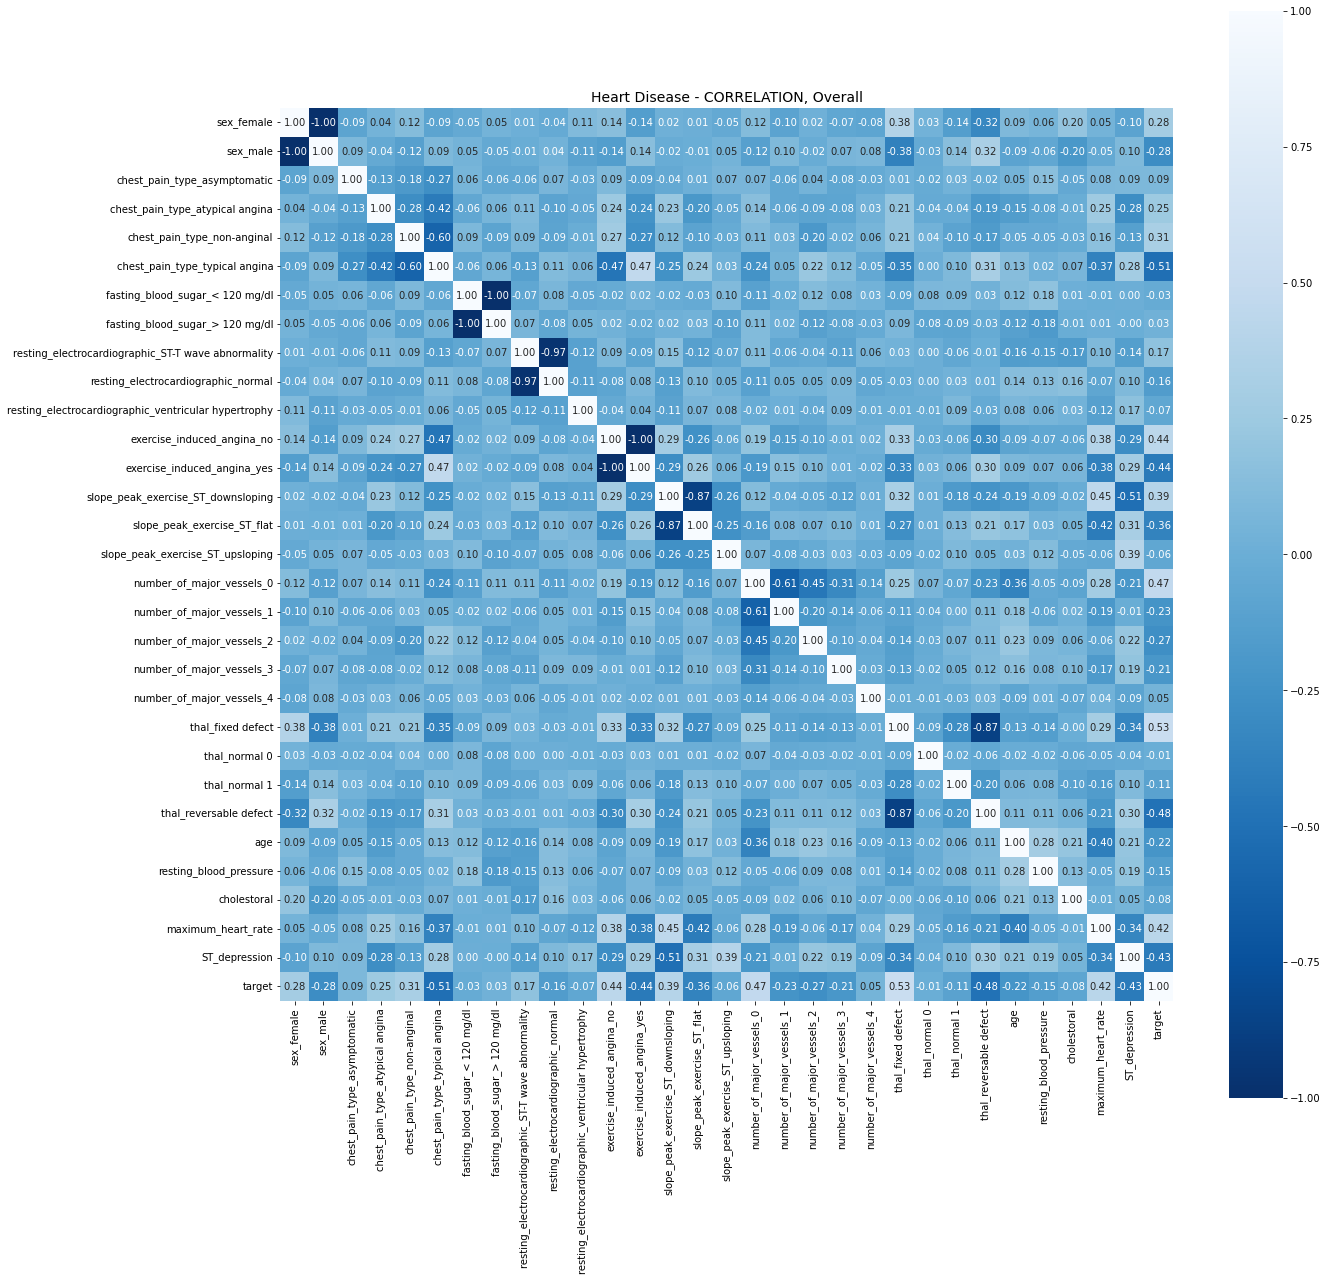

In [31]:
# Heatmap (overall)
# Heatmaps are a great way of representing correlation visually. However, due to the amount of attributes in the dataframe, it looks very cluttered.
dataCorr = df.corr()
plt.figure(figsize=(20,20))
plt.title('Heart Disease - CORRELATION, Overall', fontsize=14)
sns.heatmap(dataCorr, annot=True, fmt='.2f', square=True, cmap = 'Blues_r')

In [32]:
# Table (overall)
# Table with the sorted 'target' data provides a better format for understanding heart disease correlation
corrALL = dataCorr['target'].sort_values(ascending=False)
corrALL = corrALL.drop(['target'])
corrALL.to_frame()

,target
thal_fixed defect,0.526030
number_of_major_vessels_0,0.470849
exercise_induced_angina_no,0.435601
maximum_heart_rate,0.419955
slope_peak_exercise_ST_downsloping,0.392121
chest_pain_type_non-anginal,0.313696
sex_female,0.283609
chest_pain_type_atypical angina,0.247649
resting_electrocardiographic_ST-T wave abnormality,0.172827
chest_pain_type_asymptomatic,0.087959


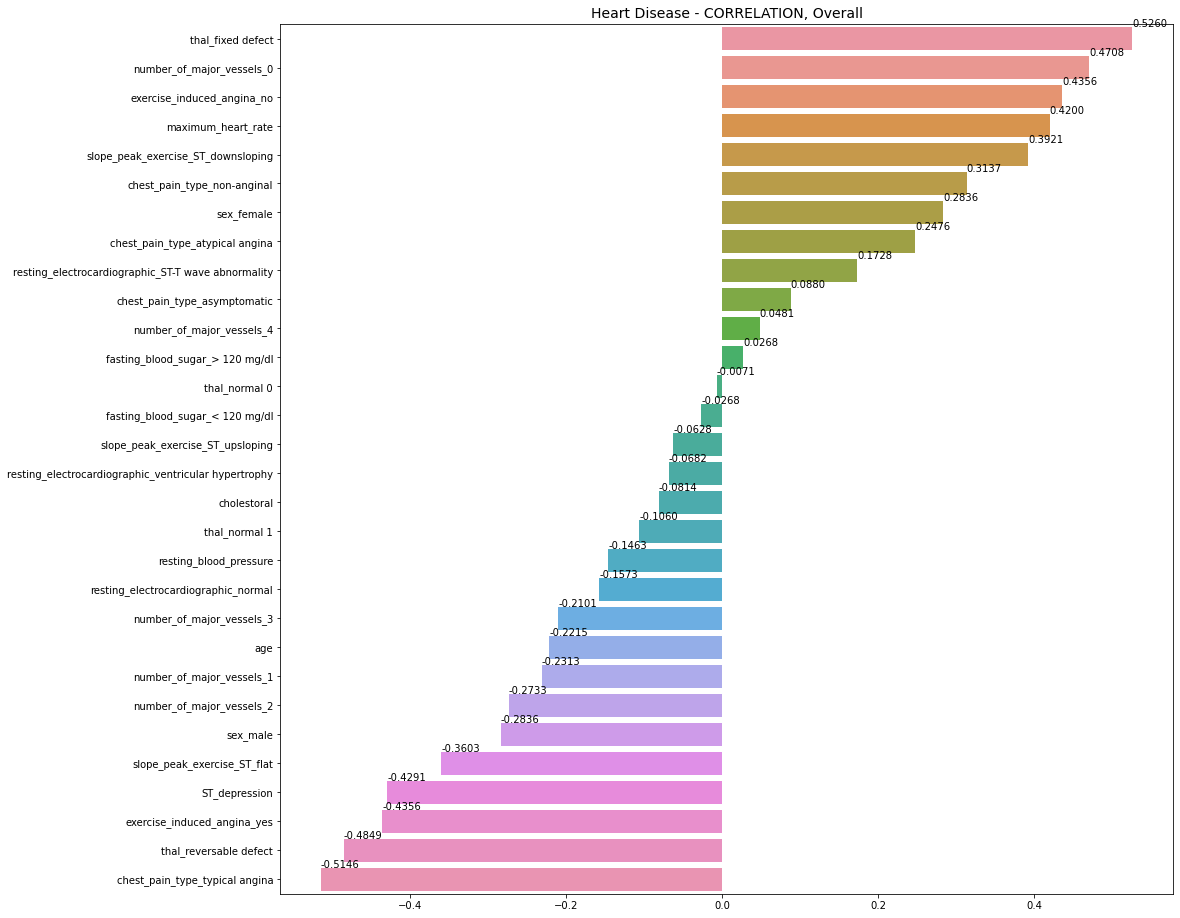

In [34]:
# Barplot (overall)
# Barplot provides the best visualization for the correlation
plt.figure(figsize=(16,16))
plt.title('Heart Disease - CORRELATION, Overall', fontsize=14)
ax = sns.barplot(y=corrALL.index,x=corrALL.values)
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()))
plt.show()

Correlation -female

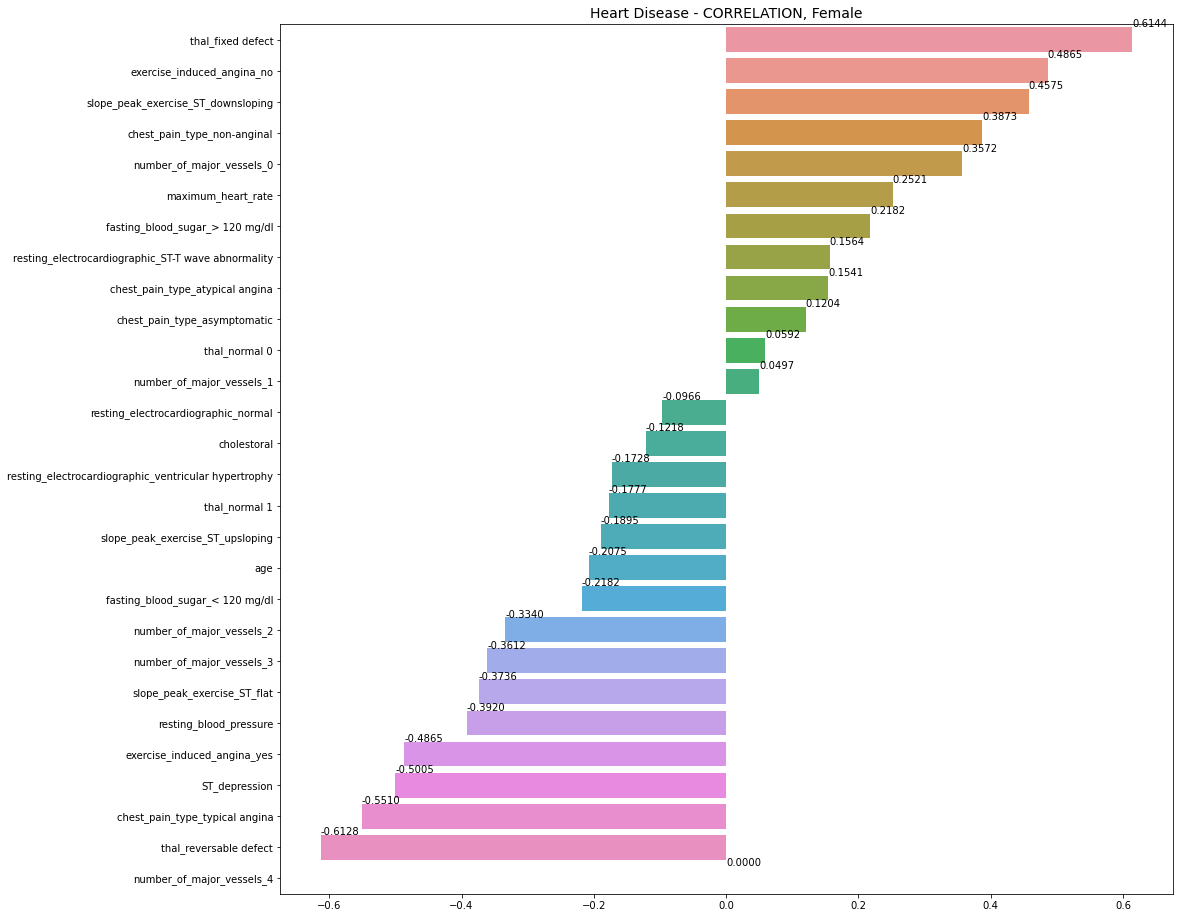

In [35]:
'''
Step for creating the correlation Barplot for FEMALE
1. Select 'sex_female' = 1 data
2. Drop 'sex_female' and 'sex_male' attributes and take correlation
3. Sort on 'target' column
4. Drop 'target' column
5. Plot bar for 'sex_female'
'''
dataFemale = df[(df['sex_female'] == 1)]
dataFemaleCorr = dataFemale.drop(['sex_female','sex_male'], axis=1).corr()
dataFemaleCorr = dataFemaleCorr['target'].sort_values(ascending=False)
dataFemaleCorr['number_of_major_vessels_4'] = 0  # -7.9e-17  all numbers will be exp if not set to 0
dataFemaleCorr.to_frame()
dataFemaleCorr = dataFemaleCorr.drop(['target'])  # for barplot

plt.figure(figsize=(16,16))
plt.title('Heart Disease - CORRELATION, Female', fontsize=14)
ax = sns.barplot(y=dataFemaleCorr.index,x=dataFemaleCorr.values)
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()))
plt.show()

Correlation -male

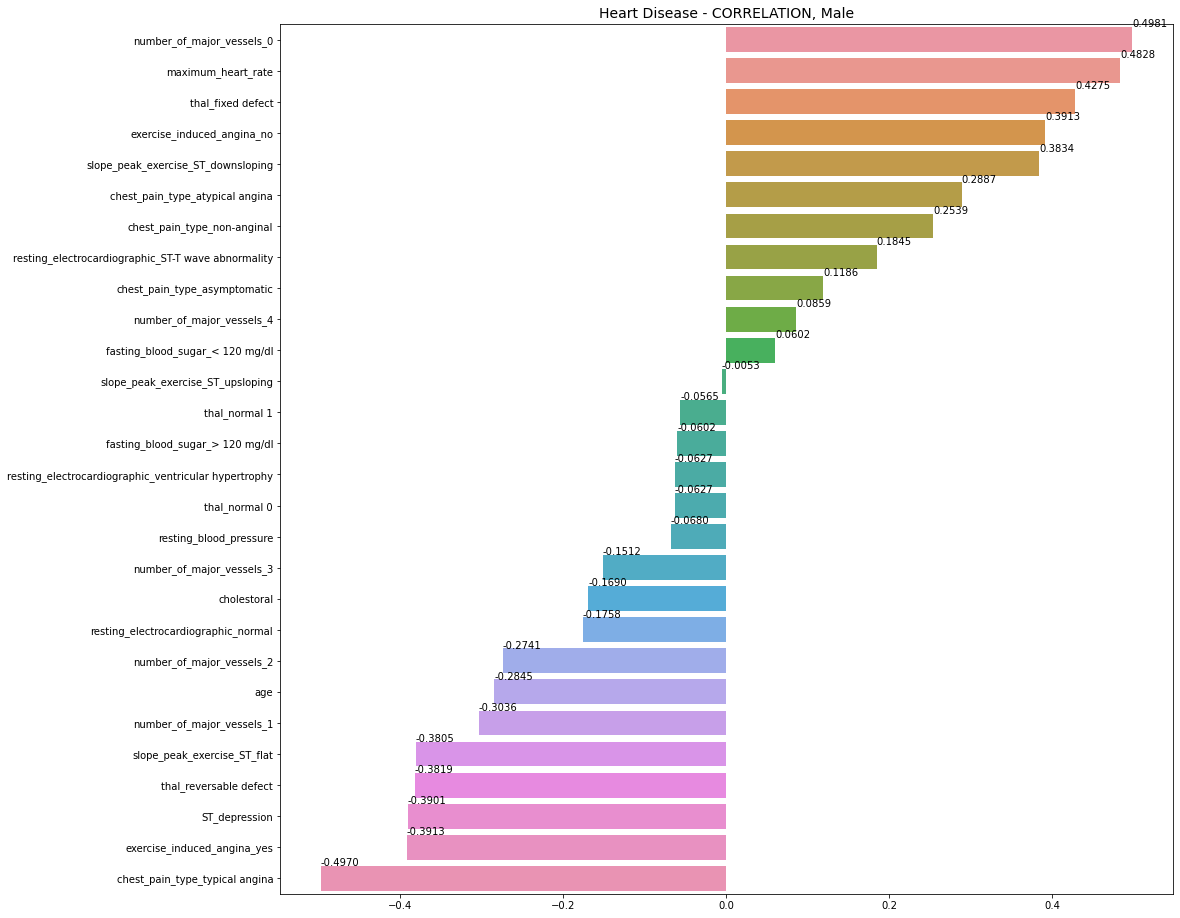

In [36]:
'''
Step for creating the correlation the Barplot for MALE
1. Select 'sex_male' = 1 data
2. Drop 'sex_female' and 'sex_male' attributes and take correlation
3. Sort on 'target' column
4. Drop 'target' column
5. Plot bar for 'sex_female'
'''
dataMale   = df[(df['sex_male'] == 1)]
dataMaleCorr = dataMale.drop(['sex_female','sex_male'], axis=1).corr()
dataMaleCorr = dataMaleCorr['target'].sort_values(ascending=False)
dataMaleCorr = dataMaleCorr.drop(['target'])

plt.figure(figsize=(16,16))
plt.title('Heart Disease - CORRELATION, Male', fontsize=14)
ax = sns.barplot(y=dataMaleCorr.index,x=dataMaleCorr.values)
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()))
plt.show()

Obeservations

Factors resulting in heart disease are markedly different for female and males.

- female: thal fixed and reversable defect are major factors in heart disease, as well as angina type chest pains and ST_depression.
- male: number of vessels, angina type chest pains and maximum_heart_rate are major factors in heart disease.

.

Train/Test Split

In [37]:
from sklearn.model_selection import train_test_split

X = df.drop(['target'], axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:  ', X_train.shape,  y_train.shape)
print ('Test set:   ', X_test.shape,  y_test.shape)

Train set:   (241, 30) (241,)
Test set:    (61, 30) (61,)


Classification model -logistic_regression

In [38]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [39]:
# Predict generates output predictions from the input samples and is used for evaluating the model
y_predict = LR.predict(X_test)
y_predict[0:10]

array([1., 0., 1., 1., 0., 1., 1., 1., 1., 0.])

### Evaluate Model

Cross validation score

In [41]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(LR, X_train, y_train, cv=5, scoring='accuracy'))
print('Cross Validation Score (mean):  {:3.4%}'.format(cross_val_score(LR, X_train, y_train, cv=5, scoring='accuracy').mean()))

[0.73469388 0.8125     0.91666667 0.75       0.91666667]
Cross Validation Score (mean):  82.6105%


Accuracy score

In [42]:
from sklearn.metrics import accuracy_score

print('Accuracy Score:  {:3.4%}'.format(accuracy_score(y_test,y_predict)))

Accuracy Score:  86.8852%


F1 score

In [43]:
from sklearn.metrics import f1_score

f1score = f1_score(y_test, y_predict)
print('F1 Score:  {:3.4%}'.format(f1score))

F1 Score:  89.1892%


Confusion Matrix

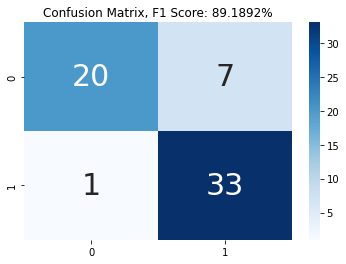

True Positive:	20
True Negative:	7
False Positive:	1
False Negative:	33


In [44]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_predict)

sns.heatmap(conf_matrix, annot=True,cmap='Blues',annot_kws={"size": 30})
plt.title("Confusion Matrix, F1 Score: {:3.4%}".format(f1score))
plt.show()

print('True Positive:\t{}'.format(conf_matrix[0,0]))
print('True Negative:\t{}'.format(conf_matrix[0,1]))
print('False Positive:\t{}'.format(conf_matrix[1,0]))
print('False Negative:\t{}'.format(conf_matrix[1,1]))

Receiver Operating Characteristics (ROC)

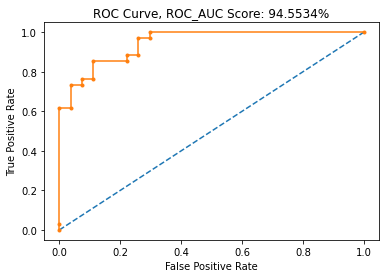

In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

LR.probability = True   # need for predict_proba to work
LR.fit(X_train,y_train)
y_predita = LR.predict_proba(X_test)
y_predita = y_predita[:,1]   # positive values only
    
ROC_AUC = roc_auc_score(y_test, y_predita)
fpr, tpr, thresholds = roc_curve(y_test, y_predita)

plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve, ROC_AUC Score: {:3.4%}".format(ROC_AUC))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Classification report

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.95      0.74      0.83        27
         1.0       0.82      0.97      0.89        34

    accuracy                           0.87        61
   macro avg       0.89      0.86      0.86        61
weighted avg       0.88      0.87      0.87        61



Log loss

In [48]:
from sklearn.metrics import log_loss

#  predict_proba returns estimates for all classes
y_predict_prob = LR.predict_proba(X_test)
print(y_predict_prob[0:5])

print("\nLog Loss:  {:3.4}".format(log_loss(y_test, y_predict_prob)))

[[0.45890315 0.54109685]
 [0.59123804 0.40876196]
 [0.37507261 0.62492739]
 [0.40906285 0.59093715]
 [0.6490443  0.3509557 ]]

Log Loss:  0.5114


# V3

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import scipy.stats as stt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
data = pd.read_csv("/home/sabi/datasets/heart_disease_data.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
print(data.shape)
data.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:xlabel='age', ylabel='count'>

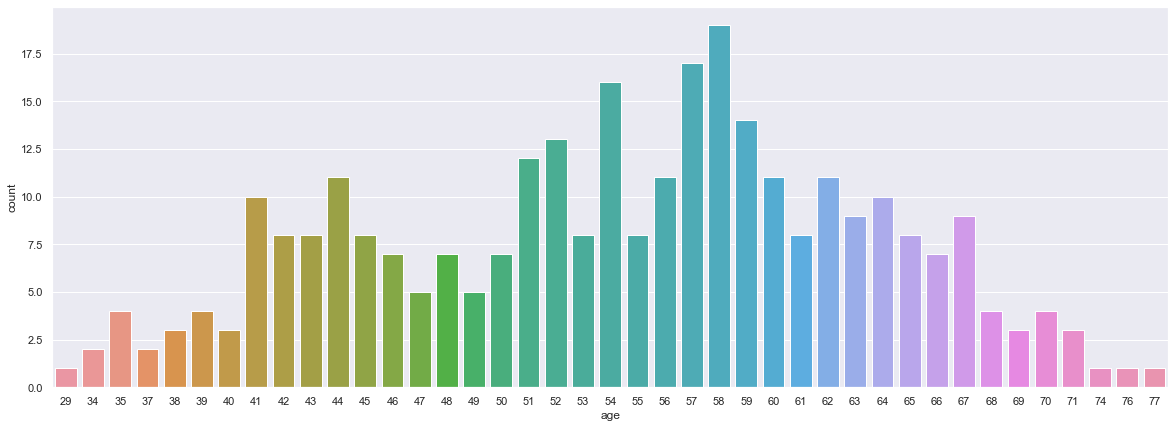

In [13]:
plt.figure(figsize=(20, 7))
sns.set()
sns.countplot(data.age)

<AxesSubplot:>

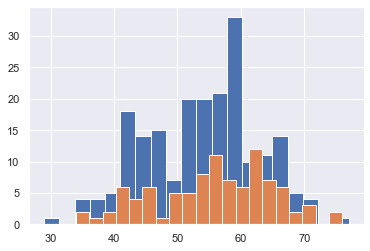

In [14]:
data[data.sex == 1].age.hist(bins=20)
data[data.sex == 0].age.hist(bins=20)

Here male/female age distribution is equal, but different in count

In [15]:
print("Male in sample - {:.2%}".format(data[data.sex == 1].shape[0]/data.shape[0]))

Male in sample - 68.32%


<AxesSubplot:ylabel='row_0'>

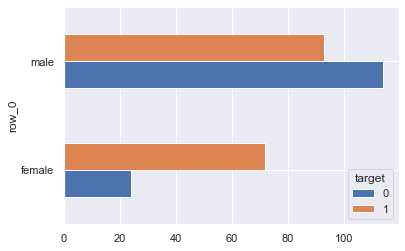

In [17]:
sex_str = np.where(data.sex == 1, 'male', 'female')
pd.crosstab(sex_str, data.target).plot(kind='barh')

In [19]:
print("Male have disease: ", data[(data.sex == 1)&(data.target == 1)].shape[0]/data[data.sex == 1].shape[0])
print("Female have disease: ", data[(data.sex == 0)&(data.target == 1)].shape[0]/data[data.sex == 0].shape[0])

Male have disease:  0.4492753623188406
Female have disease:  0.75


Women in this sample is much more sick than men

<AxesSubplot:title={'center':"Don't have disease"}, xlabel='age', ylabel='count'>

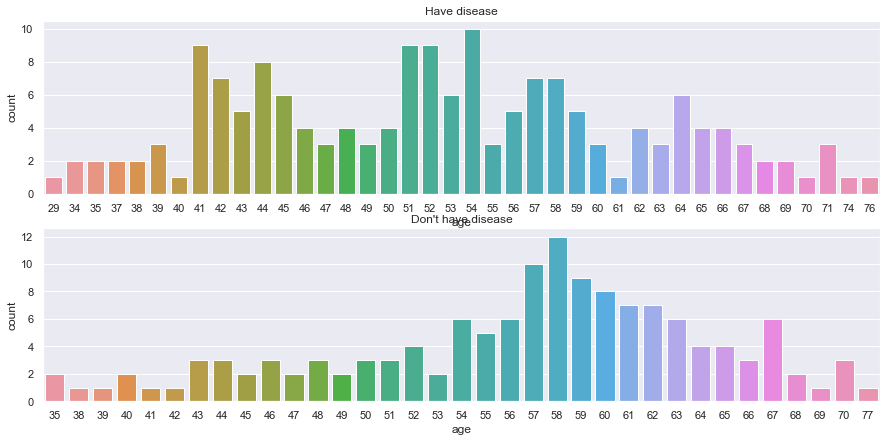

In [21]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(2,1,1)
ax1.set_title('Have disease')
ax1.tick_params(labelbottom='off',axis='x')
sns.countplot(data[data.target == 1].age)
ax2 = fig.add_subplot(2,1,2)
ax2.set_title('Don\'t have disease')
sns.countplot(data[data.target == 0].age)

- From this plot we can see that the danger of the disease is greatly increased from 43 years.
- But plot below shows the situation isn't bad and lot of people are healthy in 54-65 years
- It means age is ambigous and age don't show certainly probability of getting sick

Humans have chest pain and disease: 76.36%


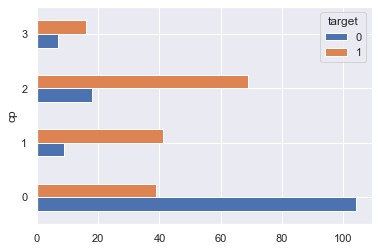

In [26]:
pd.crosstab(data.cp, data.target).plot(kind='barh')
print('Humans have chest pain and disease: {:.2%}'.format(data[(data.target == 1)&(data.cp != 0)].shape[0]/data[data.target == 1].shape[0]))

Here we can that chest pain often means that the person is sick, but in about 24% still dangerous situation when human don't feel pain, but have disease. so chest pain is releavent

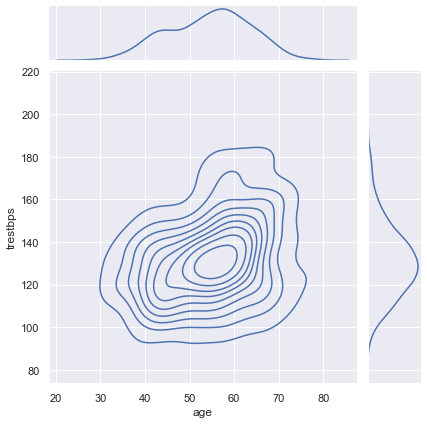

In [31]:
sns.jointplot(data.age, data.trestbps, kind='kde')

It seems logical to check how releated age and resting blood pressure(trestbps), but corrplot show very weak correlation

<AxesSubplot:xlabel='age', ylabel='trestbps'>

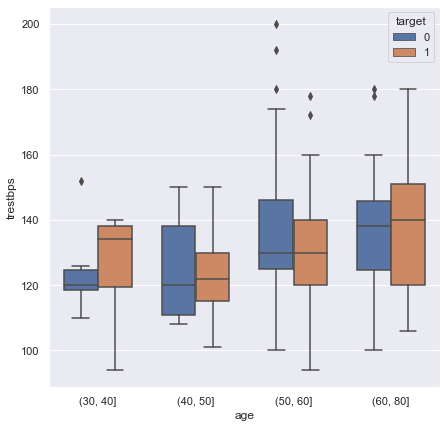

In [33]:
categ = pd.cut(data.age,[30, 40, 50, 60, 80])
data_new = data[['target','trestbps']]
data_new['age'] = categ
plt.figure(figsize=(7,7))
sns.boxplot(x='age',y='trestbps',hue='target',data=data_new,width=0.7)

Here age cut to some periods. We see same weak trend to high blood pressure by age, but we can't say anything about relation with blood pressure and target.
Means in disease/not disease slightly different, but (Q3 - Q1) doesn't support this assumtion

<AxesSubplot:xlabel='target', ylabel='trestbps'>

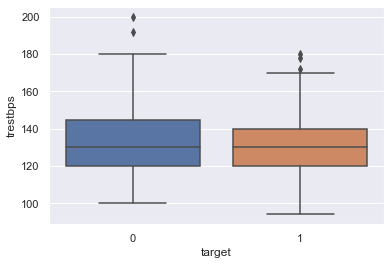

In [34]:
sns.boxplot(x=data.target, y=data.trestbps)

<AxesSubplot:>

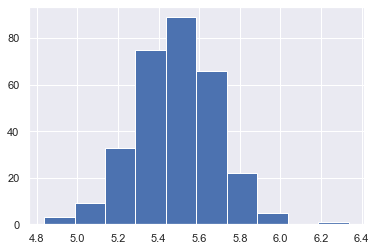

In [36]:
np.log(data.chol).hist()

Cholestrol histogram seems like normal distribution. By ttest we can see, that means are equal, that badfor predictive ablility of this feature to the target

Ttest_indResult(statistic=1.4842450762526975, pvalue=0.13879032695600646)

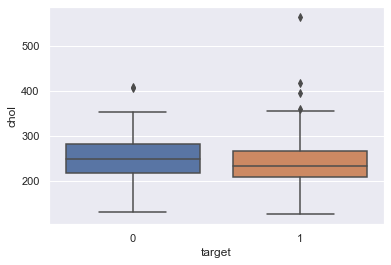

In [39]:
sns.boxplot(x=data.target, y=data.chol)
fst = data[data.target == 0].chol
scd = data[data.target == 1].chol
stt.ttest_ind_from_stats(fst.mean(), fst.std(), fst.shape[0], scd.mean(), scd.std(), scd.shape[0], equal_var=True)

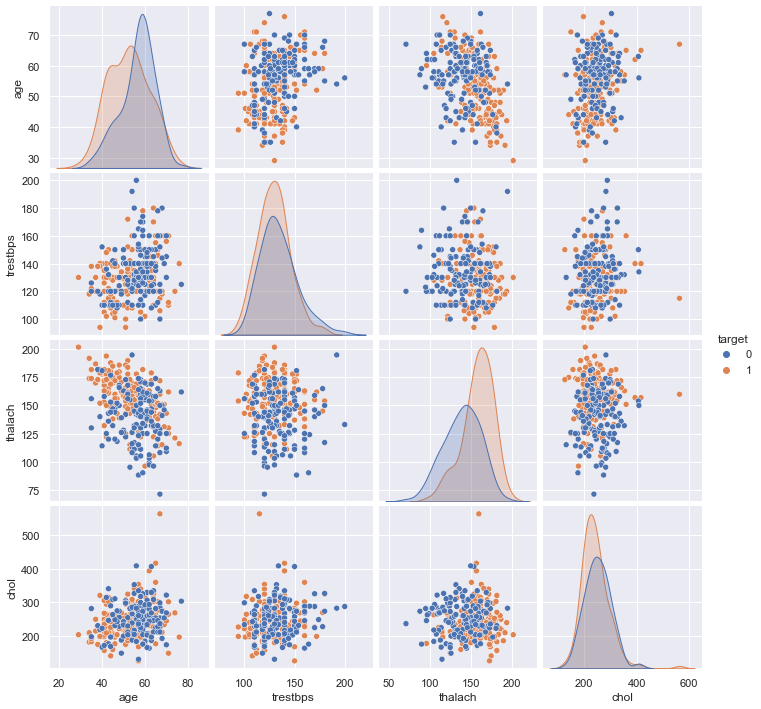

In [41]:
sns.pairplot(data[['age','trestbps','thalach','chol','target']],hue='target',size=2.5)

Now consider coorplot will all meterical data. This corrplot can't show any high relation

<AxesSubplot:ylabel='fbs'>

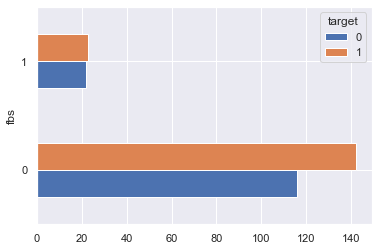

In [42]:
pd.crosstab(data.fbs,data.target).plot(kind='barh')

This crosstab show that when fasting blood sugar < 120, probability of disease is higher. But this relation isn't high

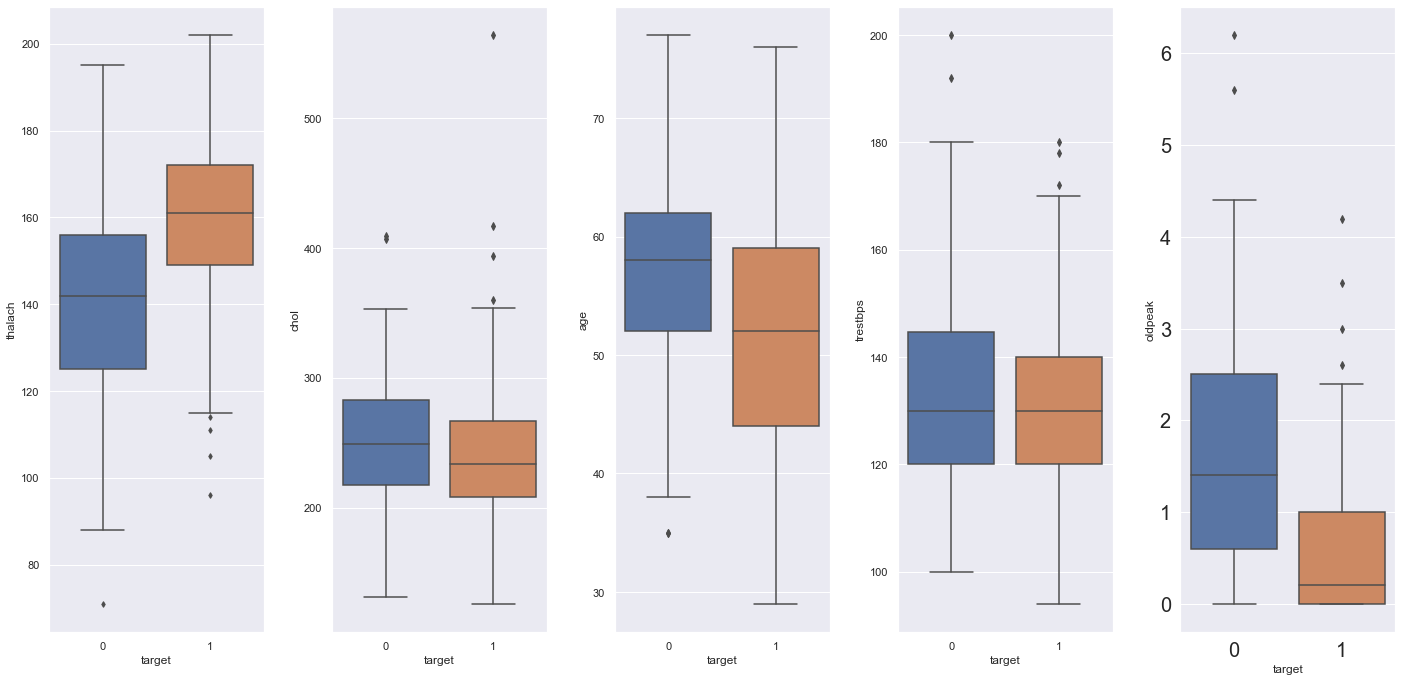

In [43]:
f, axes = plt.subplots(1, 5,figsize=(20,10))
sns.set(font_scale=2)
sns.boxplot(x=data.target, y=data.thalach, ax=axes[0],fliersize=4);
sns.boxplot(x=data.target, y=data.chol, ax=axes[1]);
sns.boxplot(x=data.target, y=data.age, ax=axes[2]);
sns.boxplot(x=data.target, y=data.trestbps, ax=axes[3]);
sns.boxplot(x=data.target, y=data.oldpeak, ax=axes[4]);
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()

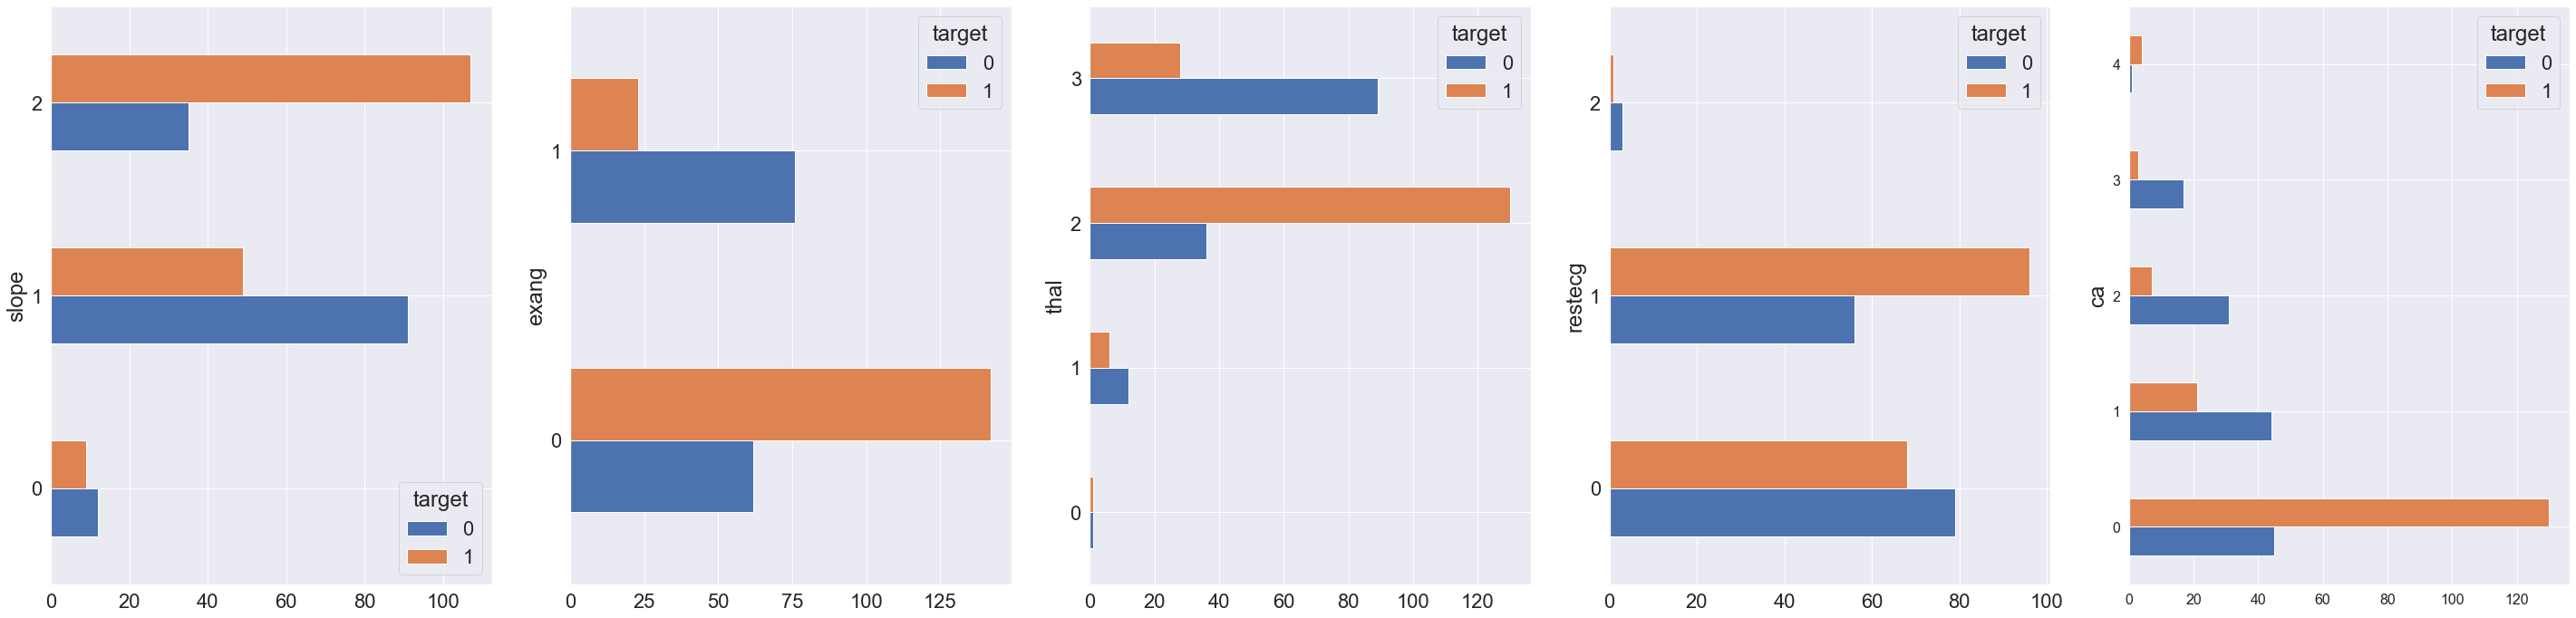

In [44]:
f, axes = plt.subplots(1, 5,figsize=(40,10))
sns.set(font_scale=2)
pd.crosstab(data.slope,data.target).plot(kind='barh', ax=axes[0]);
pd.crosstab(data.exang,data.target).plot(kind='barh', ax=axes[1]);
pd.crosstab(data.thal,data.target).plot(kind='barh', ax=axes[2]);
pd.crosstab(data.restecg,data.target).plot(kind='barh', ax=axes[3]);
pd.crosstab(data.ca,data.target).plot(kind='barh', ax=axes[4]);
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()

Consider last cathegorical features. They are important and show relations with target.

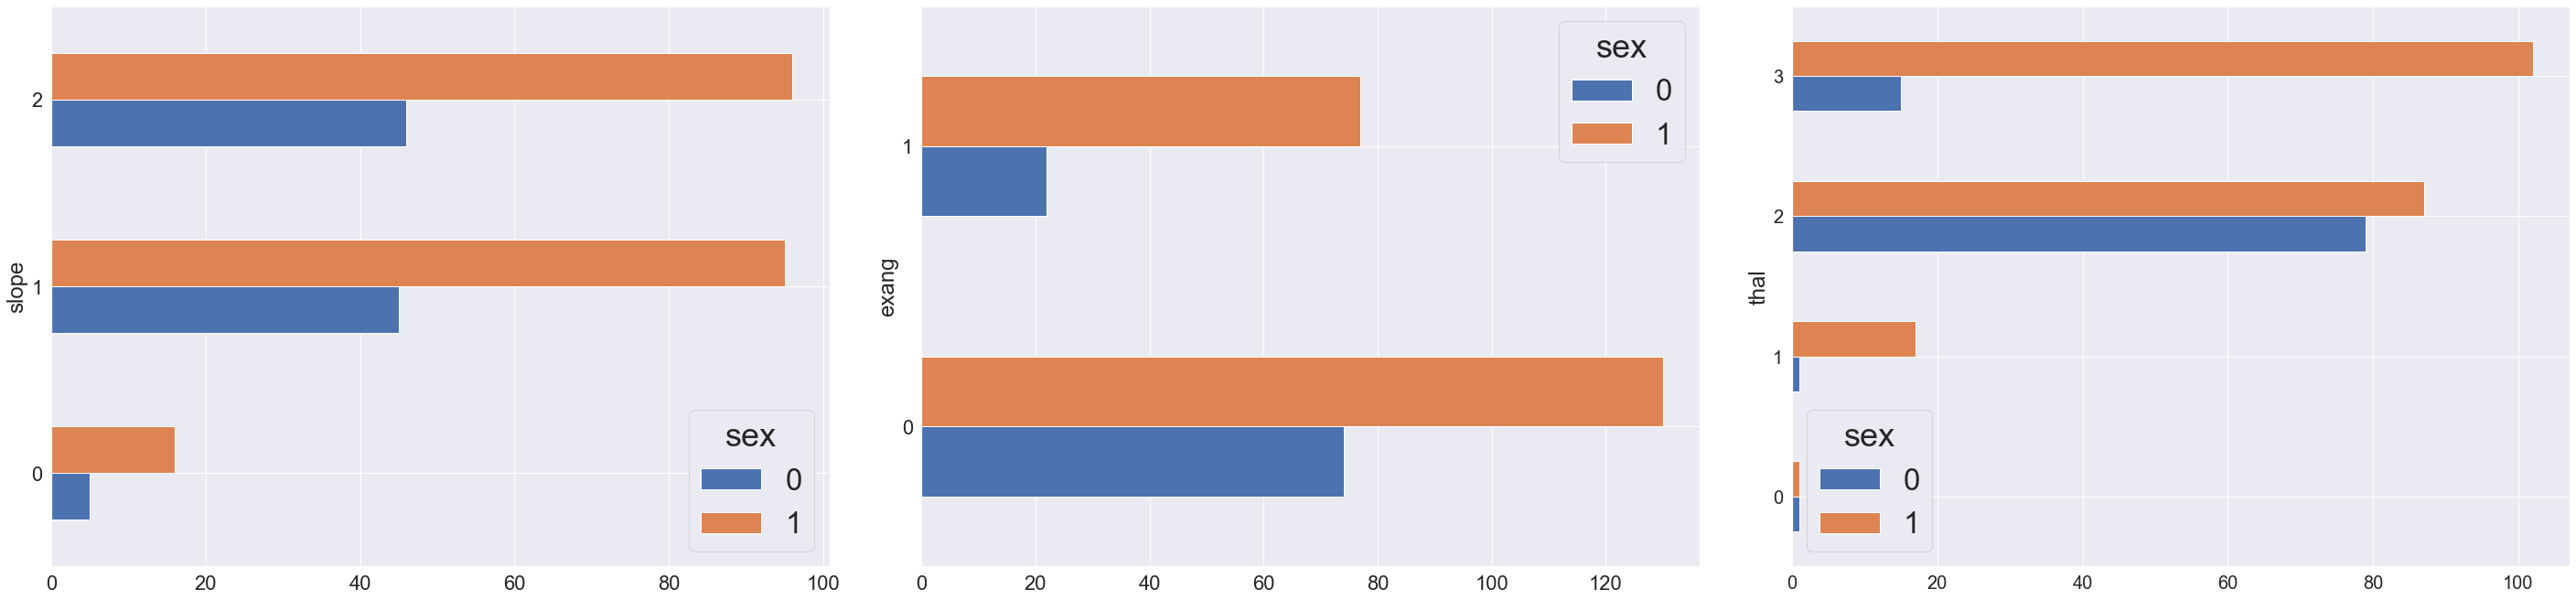

In [45]:
f, axes = plt.subplots(1, 3,figsize=(40,10))
sns.set(font_scale=3)
pd.crosstab(data.slope,data.sex).plot(kind='barh', ax=axes[0]);
pd.crosstab(data.exang,data.sex).plot(kind='barh', ax=axes[1]);
pd.crosstab(data.thal,data.sex).plot(kind='barh', ax=axes[2]);
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()

Crosstab with sex and (slope/thal/exang) show that they are related. It's nean that together with sex this feature can work better

<AxesSubplot:xlabel='target', ylabel='count'>

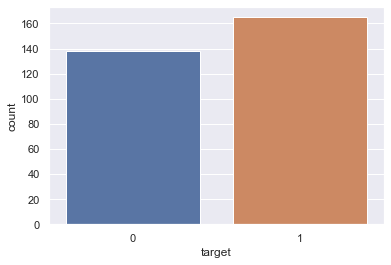

In [46]:
sns.set(font_scale=1)
sns.countplot(data.target)

Classes are just about same

After all the manipulations with data, we leave age, sex, cp, thalach, exang, oldpeak, slope, ca and thal

Many of the features are categorical, therefore to faciliate the solution, used trees methods.
n_estimators=100 for Random Forest, these set of features give more AUC-score thatn set from all features

In [47]:
data_train, data_test, targ_train, targ_test = train_test_split(data[['age','sex','cp','thalach','exang','oldpeak','slope','ca','thal']], data.target, test_size=0.2)

In [49]:
forest = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=4)
forest.fit(data_train,targ_train)

RandomForestClassifier(max_depth=4)

In [50]:
labels = forest.predict(data_test)
sns.set(font_scale=1.5)
auc = roc_auc_score(labels, targ_test)
fpr, tpr, thresholds = roc_curve(labels, targ_test)
print('ROC curve: AUC={0:0.2f}'.format(auc))

ROC curve: AUC=0.80


Dataset is small, so we can apply cross validation. And this score doesn't show big deviations from our prediction

In [53]:
scores = cross_val_score(forest, data[['age','sex','cp','thalach','exang','oldpeak','slope','ca','thal']], data.target, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.84 (+/- 0.05)


In [54]:
print(classification_report(labels,targ_test))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76        24
           1       0.86      0.81      0.83        37

    accuracy                           0.80        61
   macro avg       0.79      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [57]:
forest.feature_importances_

array([0.05837014, 0.04468756, 0.2078571 , 0.12499488, 0.0535352 ,
       0.16181553, 0.04062759, 0.13629191, 0.17182009])

Here we can see feature importances from the model

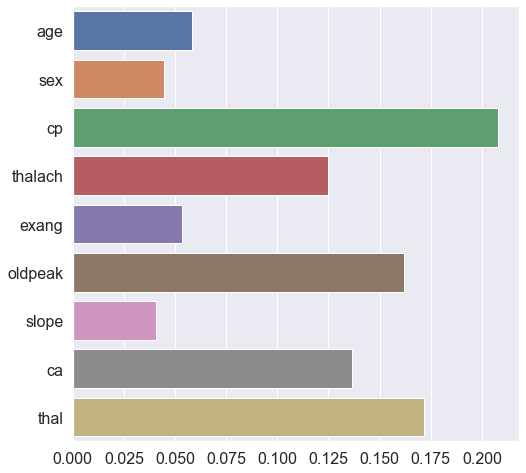

In [58]:
feat_imp = pd.DataFrame(forest.feature_importances_, index = ['age','sex','cp','thalach','exang','oldpeak','slope','ca','thal'])
plt.figure(figsize=(8,8));
sns.barplot(feat_imp[0],feat_imp.index);
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel('');